# Прикладные дифференциальные уравнения
## Занятие 4
*Илья Щуров*

Факультет компьютерных наук, Прикладная математики и информатика, 2021-22 учебный год

[Страница курса](http://math-info.hse.ru/2021-22/Прикладные_дифференциальные_уравнения)

In [1]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
def matrix_exp(A, degree=100):
    n = A.shape[0]
    assert A.shape == (n, n)
    X = np.eye(n)
    terms = [X]
    for i in range(1, degree):
        X = (X @ A) / i
        terms.append(X)
    return np.array(terms).sum(axis=0)

In [3]:
matrix_exp(np.array([[1, 0], 
                     [0, 1]]), degree=100)

array([[2.71828183, 0.        ],
       [0.        , 2.71828183]])

In [4]:
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-1, 0, 0]])

In [5]:
def trajectory(A, x0, delta_t, steps):
    exp_Adt = matrix_exp(A * delta_t)
    traj = [x0]
    for i in range(steps - 1):
        traj.append(exp_Adt @ traj[-1])
    return np.array(traj)

In [6]:
tr_n = 50
initial_values = [np.random.uniform(-0.1, 0.1, 3) for i in range(tr_n)]
trajectories = [
    trajectory(A, initial_value, 0.1, 30) 
    for initial_value in initial_values
] + [
    trajectory(-A, initial_value, 0.1, 30) 
    for initial_value in initial_values
]
go.Figure(
    [
        go.Scatter3d(x=traj[:, 0], y=traj[:, 1], z=traj[:, 2], 
                     mode="lines")
        for traj in trajectories
    ]
)

In [7]:
np.linalg.eig(A)

(array([-1. +0.j       ,  0.5+0.8660254j,  0.5-0.8660254j]),
 array([[-0.57735027+0.j , -0.28867513-0.5j, -0.28867513+0.5j],
        [ 0.57735027+0.j ,  0.28867513-0.5j,  0.28867513+0.5j],
        [-0.57735027+0.j ,  0.57735027+0.j ,  0.57735027-0.j ]]))

In [8]:
%matplotlib inline

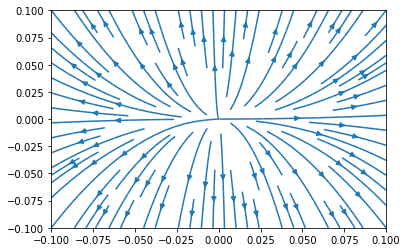

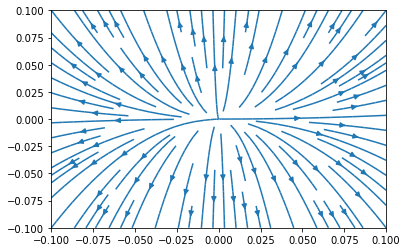

In [9]:
x = np.linspace(-0.1, 0.1, 101)
y = np.linspace(-0.1, 0.1, 101)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y,
               X, 2 * Y)
plt.figure()
plt.streamplot(X, Y,
               np.sin(X), np.sin(2 * Y))

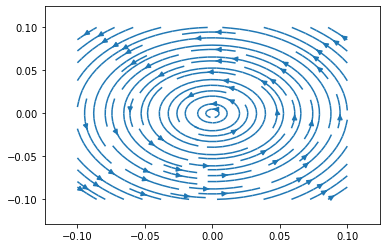

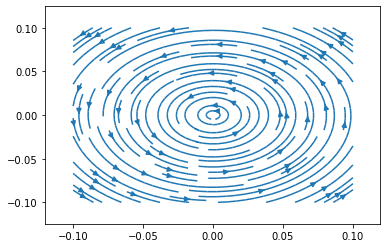

In [10]:
x = np.linspace(-0.1, 0.1, 101)
y = np.linspace(-0.1, 0.1, 101)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y,
               -Y, X)
plt.figure()
plt.streamplot(X, Y,
               -Y - X * (X ** 2 + Y ** 2), 
               X - Y * (X ** 2 + Y ** 2))

In [11]:
from scipy.integrate import odeint

In [12]:
def center(X, t):
    x, y = X
    return np.array([y, -x])

def slow_focus(X, t):
    x, y = X
    return np.array([y, -x]) - np.array([x, y]) * (x ** 2 + y ** 2)

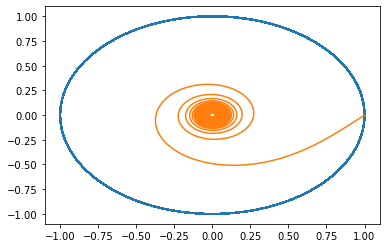

In [13]:
tr_center = odeint(center, np.array([1, 0]), np.linspace(0, 1000, 20000))
tr_slow_focus = odeint(slow_focus, np.array([1, 0]), np.linspace(0, 1000, 20000))
plt.plot(tr_center[:, 0],
         tr_center[:, 1], '-')
plt.plot(tr_slow_focus[:, 0],
         tr_slow_focus[:, 1], '-')